## Confidence Intervals for Regression Coefficients - Bootstrapping

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann, lecture 356, __[Confidence Intervals for Regression Coefficients - Bootstrapping](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/learn/lecture/17480758#overview)__.)*

By constructing confidence interval estimates, we can determine an interval where the true regression coefficient of the full population is located with a given probability, which is the ***degree of confidence***. Confidence intervals they allow us to verify whether a slope coefficient is positive with statistical significance or simply by chance.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress= True)

In [55]:
df = pd.read_csv("../assets/data/bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [56]:
# once again year 2016 of the movies dataset
df = df.loc["2016"]

In [57]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [58]:
# we want to analyze 10000 bootstrap samples
sims = 10000

In [59]:
array = df.iloc[:, -2:].values # we transform the columns budget and revenue into a numpy array
array

array([[  25.  ,    1.4 ],
       [   9.9 ,    2.4 ],
       [  10.  ,   40.06],
       [   5.2 ,    9.2 ],
       [  50.  ,   69.41],
       [  18.  ,   17.06],
       [  40.  ,  124.83],
       [  38.  ,  109.91],
       [  11.5 ,   94.07],
       [  38.  ,  112.34],
       [  10.  ,   64.19],
       [   4.5 ,   32.  ],
       [   3.5 ,    0.62],
       [ 145.  ,  521.17],
       [  80.  ,   52.1 ],
       [   0.3 ,    2.1 ],
       [  20.  ,   21.16],
       [   0.  ,    0.  ],
       [  13.5 ,    3.34],
       [   0.3 ,    2.5 ],
       [  10.  ,   18.73],
       [  28.  ,   16.37],
       [   0.33,    1.6 ],
       [  22.  ,   63.65],
       [  13.  ,    1.65],
       [  50.  ,   55.97],
       [  60.72,  553.81],
       [  58.  ,  783.11],
       [   5.  ,    0.44],
       [ 150.  , 1023.78],
       [  14.  ,    3.62],
       [  18.  ,    6.21],
       [  20.  ,   46.07],
       [  10.72,    2.98],
       [  20.  ,   12.64],
       [   3.5 ,   40.42],
       [   5.  ,   24.8 ],
 

In [60]:
size = array.shape[0] # saving number of movies
size

235

In [61]:
# creating 10.000 bootstrap samples, each containing 235 movies
np.random.seed(123) # setting the random seed
indxs = np.random.randint(low = 0, high = size, size = size * sims).reshape(sims, size) # creating np array with index positions
# getting 235 rows with 10.000 index positions,
# then reshaping it into 10.000 rows time 235 columns with reshape()

In [62]:
indxs.shape

(10000, 235)

In [63]:
indxs

array([[109, 126,  66, ..., 195, 139, 154],
       [ 92, 203, 138, ..., 233, 219,  79],
       [112, 106, 219, ..., 130, 149,  84],
       ...,
       [ 79, 133, 220, ..., 214, 130, 103],
       [140, 194,  60, ..., 125,  90,  81],
       [139, 191,  98, ...,  18, 196, 119]])

In [64]:
# slicing our movies array by the first simulation
array[indxs[0], :] # we get the first bootstrap sample

array([[ 180.  ,  356.74],
       [  18.7 ,   74.  ],
       [  20.  ,   55.03],
       [  30.  ,    2.35],
       [ 200.  , 1028.57],
       [  40.  ,  312.24],
       [   0.  ,    0.  ],
       [ 178.  ,  543.93],
       [   0.52,    1.01],
       [   3.5 ,    3.77],
       [   3.2 ,    4.27],
       [  30.  ,  445.44],
       [ 110.  ,  303.14],
       [   3.5 ,    1.49],
       [  33.  ,   77.07],
       [  18.7 ,   74.  ],
       [  15.  ,  108.29],
       [  16.5 ,    0.02],
       [  20.  ,   46.07],
       [ 125.  ,  346.86],
       [ 125.  ,   64.49],
       [   5.  ,    5.88],
       [  90.  ,  162.36],
       [ 178.  ,  543.93],
       [  73.  ,  349.78],
       [   7.5 ,    9.1 ],
       [   3.5 ,    1.49],
       [   4.3 ,    3.38],
       [  15.  ,   20.57],
       [   4.  ,   13.62],
       [  10.  ,    3.4 ],
       [  17.  ,   42.49],
       [  10.  ,   40.06],
       [   2.  ,    0.34],
       [  23.  ,   46.15],
       [  20.  ,   55.03],
       [   2.  ,    0.34],
 

In [65]:
array[indxs[0], :].shape

(235, 2)

In [66]:
coeff = np.empty(sims * 2).reshape(sims, 2) # empty np array with 10.000 rows and two columns,
# one column for the intercept, one for the slope

In [67]:
# creating our bootstrap sample 10.000 times
for i in range(sims):
    bootstr = array[indxs[i], :]
    # performing a linear regression on every sample with polyfit()
    coeff[i] = np.polyfit(x = bootstr[:, 0], y = bootstr[:, 1], deg = 1)

In [68]:
coeff # 10.000 coefficients with [slope-coefficient, intercept]

array([[  2.99,  -2.6 ],
       [  3.6 , -14.18],
       [  3.62, -19.36],
       ...,
       [  3.13,   0.62],
       [  3.39, -11.18],
       [  3.36, -21.48]])

In [69]:
coeff.shape

(10000, 2)

[]

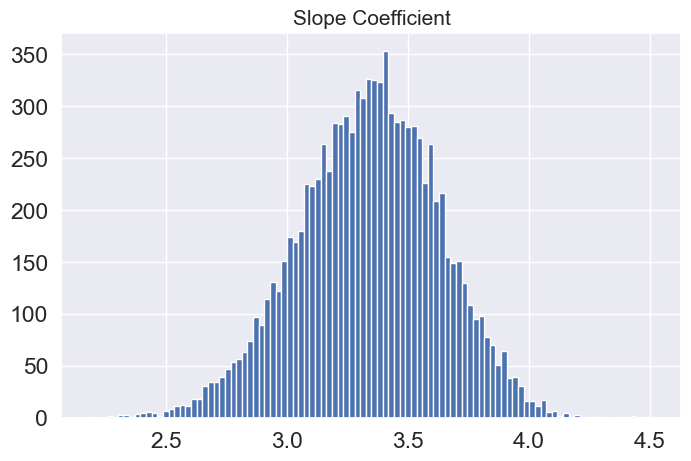

In [70]:
# creating  a histogram of the first column (= slope coefficient) with 100 bins
plt.figure(figsize = (8 ,5))
plt.hist(coeff[:, 0], bins = 100)
plt.title("Slope Coefficient", fontsize = 15)
plt.plot() # frequency distribution for the slope coefficient

The plot shows us, that it is pretty likely that the truth slope coefficient is positive.

In [71]:
# creating a confidence interval estimate with a degree of confidence of 95%
np.percentile(coeff[:, 0], [2.5, 97.5])

array([2.74, 3.89])

__We are 95% confident that the slope coefficient is in the interval between 2.74 and 3.89.__

[]

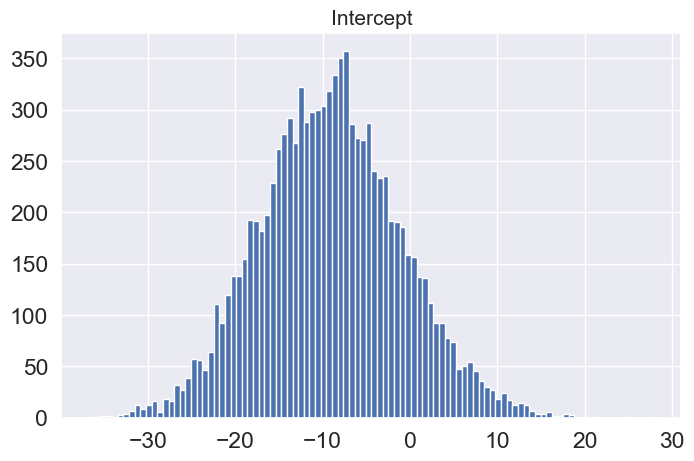

In [72]:
# creating a histogram of frequency distribution by selecting the second column (= intercept)
plt.figure(figsize = (8, 5))
plt.hist(coeff[:, 1], bins = 100)
plt.title("Intercept", fontsize = 15)
plt.plot()

__Even if the point estimate of the most frequent value is negative, we can conclude from this plot that the intercept is not significantly different from zero.__

In [73]:
np.percentile(coeff[:, 1], [2.5, 97.5])

array([-24.57,   7.51])

__We are 95% confident that the true intercept is between -24.57 and 7.51.__

In [74]:
# visualzing all 10.000 regression lines
# x values for every regression line
x = np.array([df.budget.min(), df.budget.max()])
x

array([  0., 250.])

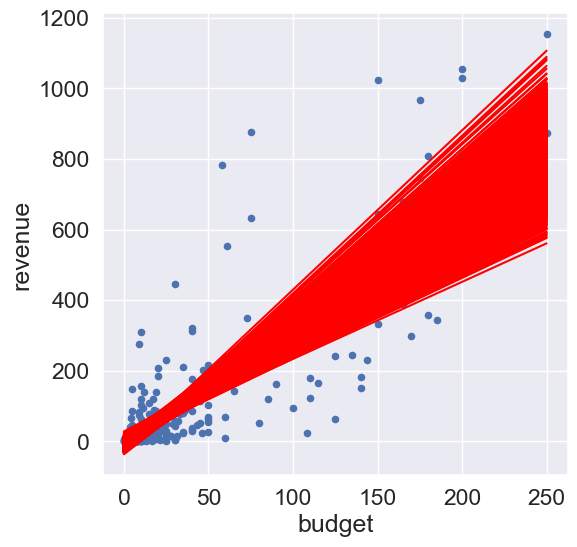

In [75]:
df.iloc[:,-2:].plot(kind = "scatter", x = "budget", y = "revenue", figsize = (6, 6))
for i in range(sims):
    # calculating the y-values for every simulation to the x-values we've set above
    y = np.polyval(coeff[i], x)
    plt.plot(x,y, color = "red")
plt.show() # plotting 10.000 regression lines

In [76]:
import seaborn as sns

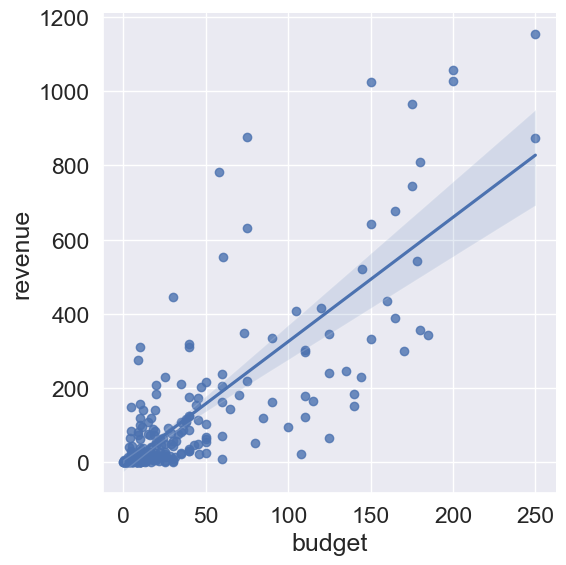

In [77]:
# creating the very same graph with seaborn
sns.set(font_scale=1.5)
# here we path the number of bootstrap samples with n_boot = 10000
# and the confidence intervall with ci = 100
sns.lmplot(data = df, x = "budget", y = "revenue", height = 6, n_boot = 10000, ci = 95)
plt.show()

__We can be 95% confident, that the true regression line is in the shaded area we see in the plot.__

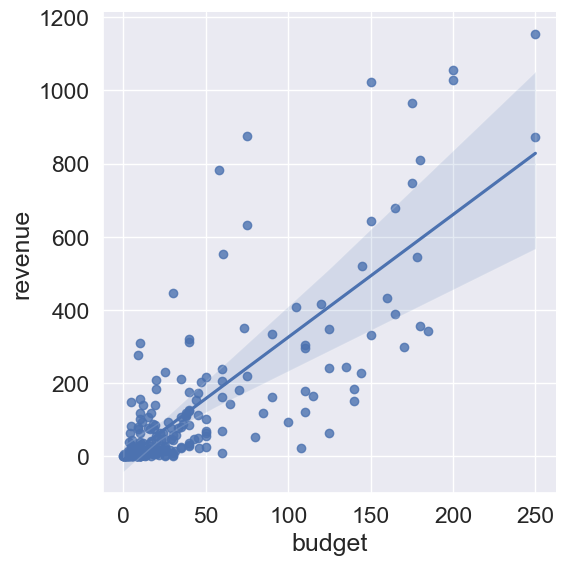

In [78]:
# increasing the degree of confidence to 100
sns.set(font_scale=1.5)
sns.lmplot(data = df, x = "budget", y = "revenue", height = 6, n_boot = 10000, ci = 100)
plt.show()